In [1]:

from parse_bullinger import *
import matplotlib.pyplot as plt

# make map for letter id and edition:
# get the letter ids matching to the editions.
id_to_edition = make_id_to_edition_map("../editions/hbbw") 


In [2]:
# get the letter df 
# infolder = "../bullinger-korpus-tei-main/bullinger-korpus-tei-main/data/letters"
# letter_df = make_letter_df(infolder, id_to_edition)  # takes about 2 minutes...
# letter_df["footnotes_per_sentence"] = letter_df.cont_footnote_count / letter_df.sent_count  # content footnotes per sentence for the stats
# letter_df.to_csv("letter_stats.csv")
letter_df = pd.read_csv("data/letter_df.csv")

letter_df.head()

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
0,0,10013,20,275,112,26,0.407273
1,1,10014,1,58,16,5,0.275862
2,2,10015,1,188,0,0,0.000000
3,3,10016,1,9,1,1,0.111111
4,4,10017,1,80,16,8,0.200000


Note: There are 211 Letters with no content footnotes, this is not a problem, most of them are published in other editions or something...

In [3]:
letter_df['cont_footnote_count'].value_counts().get(0)


211

## Some Stats

some letters have a crazy amount of footnotes:

<Axes: >

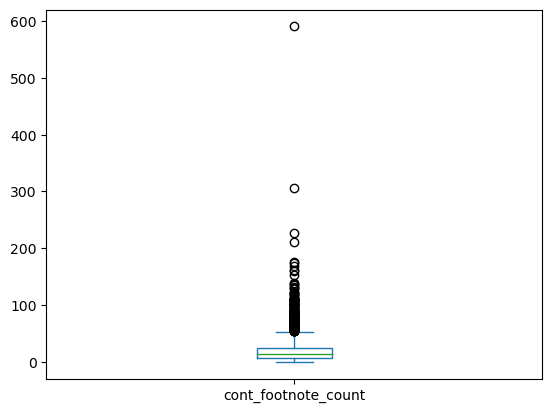

In [4]:
# 
letter_df["cont_footnote_count"].plot.box()

a bit less crazy, when compared to the length of the letters

<Axes: >

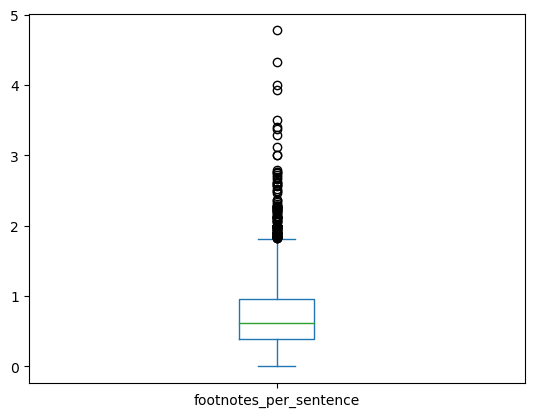

In [5]:
letter_df["footnotes_per_sentence"].plot.box()

The letter with 600 Footnotes is also a very long one. One letter has almost 5 content footnotes per sentence!!!

In [6]:

letter_df[letter_df["cont_footnote_count"]==letter_df["cont_footnote_count"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
30,30,10053,1,340,590,15,1.735294


In [7]:
letter_df[letter_df["footnotes_per_sentence"]==letter_df["footnotes_per_sentence"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
2437,2437,12477,16,9,43,2,4.777778


Editions seem to have similar amount of footnotes per sentence

<Axes: title={'center': 'footnotes_per_sentence'}, xlabel='edition'>

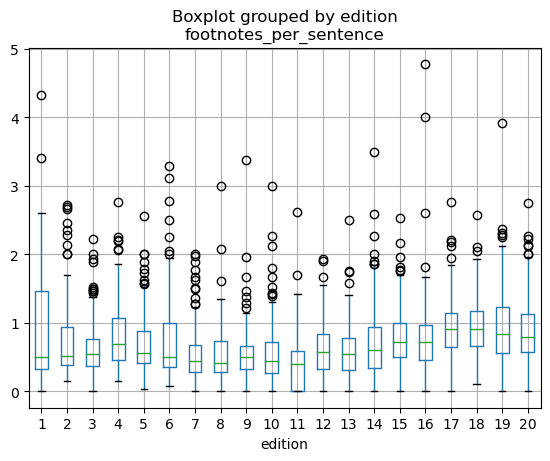

In [8]:
letter_df.boxplot(column="footnotes_per_sentence", by="edition")

### Filtering outlier letters

Defining outliers as bigger than Q3+1.5*IQR

<Axes: title={'center': 'footnotes_per_sentence'}, xlabel='edition'>

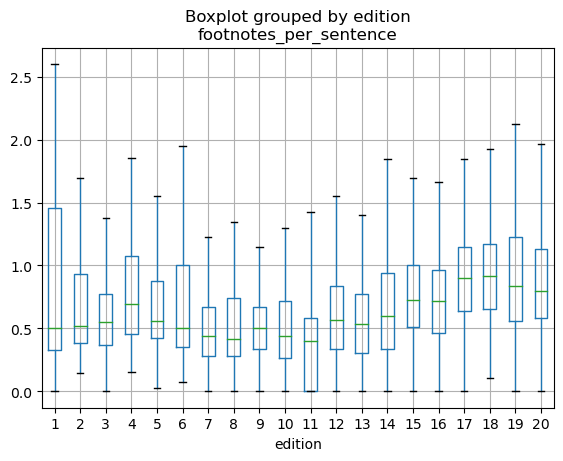

In [9]:
# plotting the data without outliers
# Note: The whiskers are drawn to the largest point WHITHIN Q3+1.5*IQR, that's why it does not necessarily reach it...
letter_df.boxplot(column="footnotes_per_sentence", by="edition", showfliers=False)

Filtering keeps more than 95% of the data :D

In [10]:
from filtering import filter_df
letter_filtered_df = filter_df(letter_df, "footnotes_per_sentence", by="edition")
print('Total number of letters:', letter_df.shape[0])
print('Number of letters in filtered df:', letter_filtered_df.shape[0])
print('percentage:', letter_filtered_df.shape[0]/letter_df.shape[0])

Total number of letters: 3113
Number of letters in filtered df: 2994
percentage: 0.9617732091230324


The maximum is now 2.6 footnotes per sentence

In [11]:
letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]

/tmp/ipykernel_22256/3801324187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]


,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
49,49,10072,1,10,26,1,2.6


## Footnote DF

In [29]:
test_df = footnote_df[footnote_df.label=="lex"]["text_footnote"]
test_df

2                                                                                                                                                                     = exercites.
30       = plebano (Leutpriester, Dorfpfarrer). - Vgl. Müllers Unterschrift in seinem Brief an Zwingli vom 16. August 1522: „Iodocus Müller, plebeianus in Chamm ...“ (Z VII 560).
54                                                                                                                                            = vult; s. Stotz IV 218f, Nr. 125.2.
55                                                                                                                                                                        = toris.
57                                                                                                                       = Lyaeus: Sorgenlöser, Beiname des Bacchus und des Weins.
                                                                                           ...           

In [28]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("data/footnote_df.csv")
footnote_df.head()

,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<persName xmlns=""http://www.tei-c.org/ns/1.0"">Wolfgang Joner, gen. R&#252;plin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gr&#252;ndete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBW</bibl> I <ref xmlns=""http://www.tei-c.org/ns/1.0"" target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.",Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,"Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.",Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3,33,10,self_ref
1,10013,20,4,3,"Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schulund Studienzeit sowie als Lehrer im Kloster Kappel in <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 2-8.","Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pr&#281;claras.",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schulund Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",21,12,misc
2,10013,20,5,3,= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5",= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4__5",2,12,lex
3,10013,20,6,4,"Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl xmlns=""http://www.tei-c.org/ns/1.0"">HBD</bibl> 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein k&#246;nnte, und beendet seine Aufz&#228;hlung mit folgender Angabe: &#8222;Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem &#8222;Promotores&#8220; nuncupavimus. Hos omnes latine scripsimus.&#8220;","Quicquid etiam lucubrationum tuarum__6<pb xmlns=""http://www.tei-c.org/ns/1.0"" type=""edition"" next=""734""/> copia resplendet.","Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. HBBibl I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. HBD 13-16), von denen die eine oder andere bereits in Dezember 1523 fertiggestellt worden sein könnte, und beendet seine Aufzählung mit folgender Angabe: „Anno Domini 1520 latine scripsimus duos dialogos adversus scholasticos theologos, duos item adversus Pipericornum [Johannes alias Josef Pfefferkorn] pro Ioanne Reuchlino, unum quoque, quem „Promotores“ nuncupavimus. Hos omnes latine scripsimus.“",Quicquid etiam lucubrationum tuarum__6 copia resplendet.,90,3,self_ref
4,10013,20,7,6,"Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7","Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7",6,6,misc


Some footnotes are crazy long...

<Axes: >

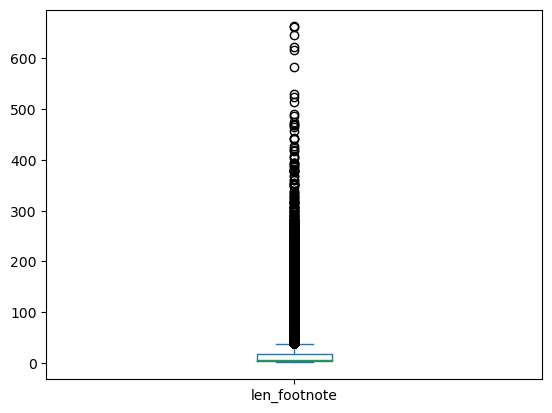

In [22]:
footnote_df["len_footnote"].plot.box()

this footnote is a small biography...

In [22]:
# 
# footnote_df[footnote_df["len_footnote"]==footnote_df["len_footnote"].max()]

long footnotes exist across editions

<Axes: title={'center': 'len_footnote'}, xlabel='edition'>

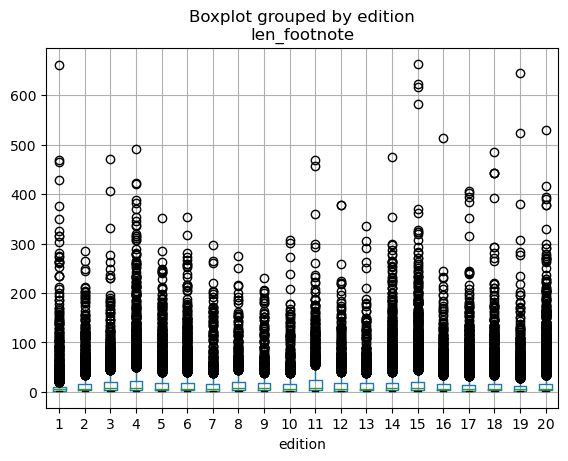

In [18]:
# 
footnote_df.boxplot(column="len_footnote", by="edition")

We filter as with the letters

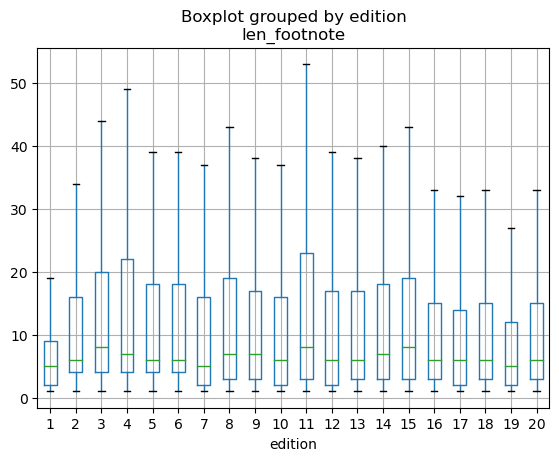

In [19]:
plot = footnote_df.boxplot(column="len_footnote", by="edition", showfliers=False)

We keep almost 90% of the data with the filtering. </br>
It does not make much of a difference in if we filter by edition or in general.
The upper limit when using toal IQR is 38, which is quite low for some editions

In [20]:
footnote_filtered_df = filter_df(footnote_df, "len_footnote", by="edition")
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers: ", footnote_filtered_df.shape[0])
print("percentage: ", footnote_filtered_df.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers:  57353
percentage:  0.8989780243894793


## data preparation:

- General prep
    - Take only the filtered letters, remove unecessary metadata (done)
    - remove all editorial footnotes (done)
    - from the content footnotes only keep the filtered ones (done)
    - train/val/test split, stratified by editions (done)

- prepare for the model
    - depending on strategy, take out all remaining footnotes
    - this could also be done just before sending the letter. But it might take up time...
    - take out only one footnote (would work better if there are a lot of other footnotes)
    - format?

    

### General Prep

Applying the downsizing, and saving the files

In [19]:
from collections import defaultdict
# get a dictionary with lists of footnotes to keep for each letter
footnotes_to_keep_dict = defaultdict(list)
for i, row in footnote_filtered_df.iterrows():
    footnotes_to_keep_dict[row["letter_id"]].append(row["n_footnote"])

In [24]:
letters_dir = "../bullinger-korpus-tei-main/bullinger-korpus-tei-main/data/letters"
filtered_dir = "data/human"

# get filepaths to all letters that we filtered
filtered_letter_ids = letter_filtered_df['letter_id']

for id in tqdm(filtered_letter_ids):
    filepath = os.path.join(letters_dir, f"{id}.xml")
    with open(filepath, "r", encoding="utf-8") as infile:
        tree = etree.parse(infile)
        root = tree.getroot()
        new_tree = etree.ElementTree(downsize_tei(root, footnotes_to_keep_dict[id]))
        filename = os.path.basename(filepath)
        new_tree.write(os.path.join(filtered_dir, filename), encoding="utf-8", pretty_print=True)

100%|██████████| 2994/2994 [01:29<00:00, 33.57it/s]


Analyzing the downsized letters


In [26]:
letter_downsized_df = make_letter_df("data/human", id_to_edition)
letter_downsized_df.tail()

  0%|          | 11/2994 [00:00<00:27, 109.72it/s]

100%|██████████| 2994/2994 [00:20<00:00, 142.62it/s]


,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count
2989,13149,20,43,12,0
2990,13150,20,16,2,0
2991,13151,20,19,6,0
2992,13152,20,12,3,0
2993,13153,20,6,0,0


In [27]:
letter_downsized_df["cont_footnote_count"].value_counts().get(0)

286

Removing the ones that are left with no footnotes

In [28]:
letter_downsized_df = letter_downsized_df[letter_downsized_df["cont_footnote_count"]!=0]
letter_downsized_df.shape[0]

2708

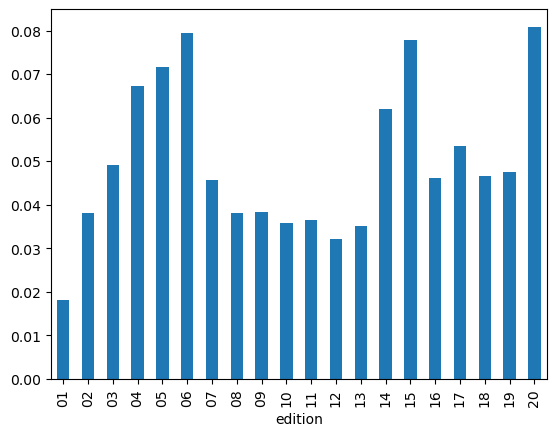

In [29]:
# number of letters per edition
def plot_edition_bar(df):
    df["edition"].value_counts(normalize=True).sort_index().plot(kind="bar")
plot_edition_bar(letter_downsized_df)

In [30]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(letter_downsized_df, test_size=0.2, stratify=letter_downsized_df["edition"])
test_df, val_df = train_test_split(test_df, test_size = 0.5, stratify=test_df["edition"])


In [32]:
import json
strat_sample_dict = {
    "train": list(train_df["letter_id"]),
    "dev": list(val_df["letter_id"]),
    "test": list(test_df["letter_id"])
}
with open("data/strat_sample.json", "w", encoding="utf-8") as outjson:
    json.dump(strat_sample_dict, outjson)


In [ ]:
test_df.head()

,letter_id,edition,word_count,sent_count,cont_footnote_count,ed_footnote_count
514,10566,05,380,32,19,0
1002,11081,07,130,17,6,0
2092,12222,15,526,18,22,0
1787,11898,14,69,9,5,0
2769,12921,20,333,37,29,0
